In [305]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [306]:
# Load the data
# (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [307]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [308]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [309]:
y_train = train_df.iloc[:,0].to_numpy()

In [310]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [311]:
y_test = test_df.iloc[:,0].to_numpy()

In [312]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

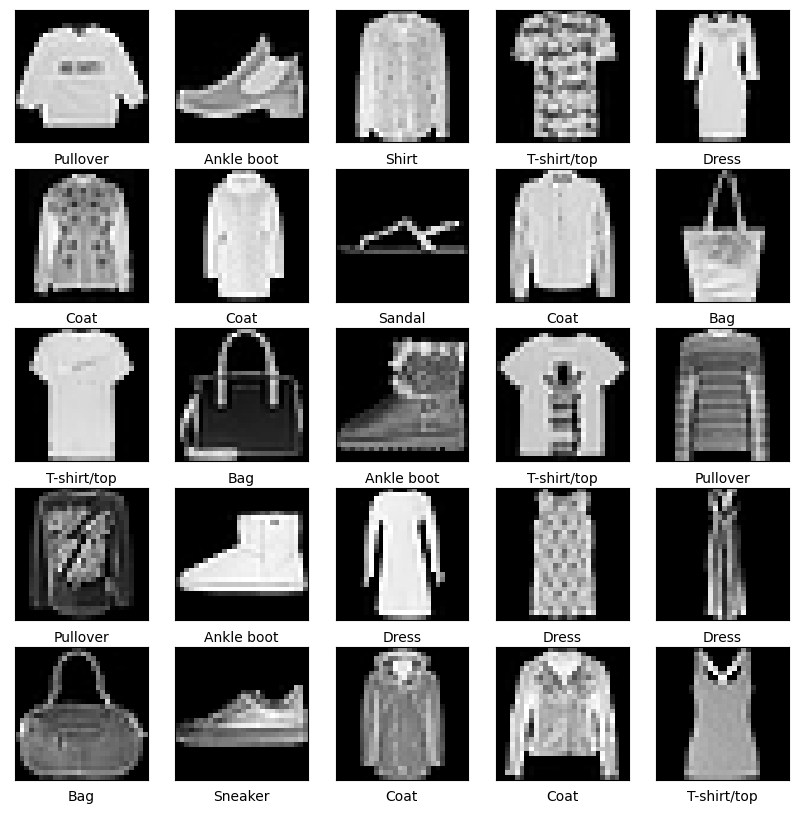

In [313]:
# Display some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [314]:
# Convert the training and testing data into tensors
x_train = tf.convert_to_tensor(x_train,)
y_train = tf.convert_to_tensor(y_train)
y_test

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [315]:
# Convert the labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

The model consists of a single convolutional layer with 16 filters, followed by a max pooling layer, a flatten layer, and two fully connected layers.

In [316]:
# Build the model
model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=num_classes, activation='softmax')
])

In [317]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [318]:
# Train the model
history = model.fit(x_train, y_train, epochs=1, batch_size=32, validation_split=0.1)

1688/1688 [==============================] - 26s 15ms/step - loss: 0.4580 - accuracy: 0.8385 - val_loss: 0.3458 - val_accuracy: 0.8780


In [319]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(test_acc, test_loss)

0.8845000267028809 0.32968100905418396


In [320]:
from sklearn.metrics import confusion_matrix

In [321]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_pred.argmax(axis=1), y_test.argmax(axis=1))

313/313 [==============================] - 2s 5ms/step


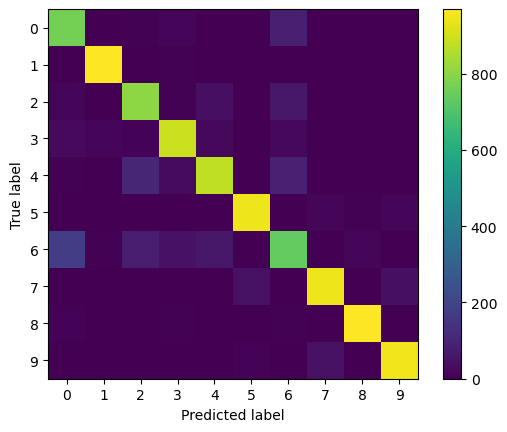

In [322]:
# Display confusion matrix as image
plt.imshow(cm)

# Add axis labels and tick marks
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Add color bar
plt.colorbar()

# Show plot
plt.show()

In [323]:
from sklearn.metrics import classification_report

In [324]:
cr = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.77      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.86      0.80      0.83      1000
       Dress       0.90      0.89      0.90      1000
        Coat       0.79      0.88      0.83      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.66      0.74      0.69      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000

